# _Bias and Variance Tradeoff Implementation_

### Importance of below libraries:

**Numpy**
1. NumPy contains a multi-dimensional array and matrix data structures.<br/>
2. It can be utilised to perform a number of mathematical operations on arrays such as trigonometric, statistical, and 
algebraic routines....<br/>
3. NumPy is an extension of Numeric and Numarray.<br/>

**Pandas**
1. It is built on the Numpy package and its key data structure is called the DataFrame.<br/> 
2. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.<br/>

**matplotlib.pyplot**
1. pyplot is a plotting library used for 2D graphics in python programming language.<br/>
2. It can be used in python scripts, shell, web application servers and other graphical user interface toolkits.<br/>

**seaborn**
1. Seaborn is a Python data visualization library based on matplotlib.<br/> 
2. It provides a high-level interface for drawing attractive and informative statistical graphics.<br/>

**Difference between Matplotlib/Seaborn**
1. Matplotlib is mainly deployed for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots and so on.<br/> 
2. Seaborn, on the other hand, provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes.<br/>

**matplotlib inline**<br/>
%matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.<br/>

**matplotlib.pylab**<br/>
Matplotlib is the whole package; matplotlib.pyplot is a module in Matplotlib; and PyLab is a module that gets installed alongside Matplotlib.<br/>
1. PyLab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space. Although many examples use PyLab, it is no longer recommended.<br/>

**rcParams and style sheets**<br/>
You can also dynamically change the default rc settings in a python script or interactively from the python shell. 
All of the rc settings are stored in a dictionary-like variable called *matplotlib.rcParams*, which is global to the matplotlib package.<br/>

**All Models tends to make some error, there is no model which can make perfect predictions, then can we control these errors
which models makes, to understand this, we need to understand the compositions which models makes. Prediction error could 
be decomposed into two components, called as *Error due to Bias* & *Error due to Variance*.No model can minimize both Bias and 
Variance. Hence, there is a tradeoff between Bias and Variance. By keeping track of these results means keep diagnosing 
model results, and it should not lead to underfitting/Overfitting condition.**

##### Description:
Here we take a data-set and try to create Underfitting/Overfitting miles and understand how errors change based on the complexity of the models, then how to find out the optimal complexity of the model where the error is minimized.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn import metrics

from sklearn.model_selection import train_test_split  # Split arrays or matrices into random train and test subsets
rcParams['figure.figsize'] = 8,6

In [2]:
import warnings
warnings.filterwarnings('ignore')

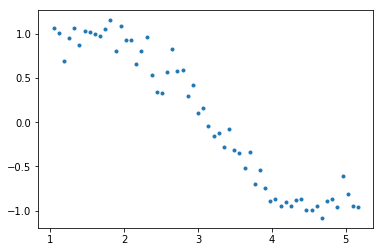

In [3]:
# create a data-set, so i take a sin wave ranging from(60,300)degrees and add some normal noise to it using
# (np.random.normal) and store the x and y values into the columns of the data-frame named curve.

np.random.seed(10)         # seed the legacy of random number generation

x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))

# numpy.column_stack() function is used to stack 1-D arrays as columns into a 2-D array. It takes a sequence of 1-D arrays 
# and stack them as columns to make a single 2-D array.

curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(curve['x'],curve['y'],'.')

In [4]:
# Here I have created a polynomial func(fit_poly), which basically fits the polynomial--of degree 1 or n, for the given 
# data-points we have.

def fit_poly(degree):
    
    # Least squares polynomial fit.
    p = np.polyfit( curve.x, curve.y, deg = degree)
    
    # Evaluate a polynomial at specific values,'p':1D array of polynomial coefficients,'x':A number, an array of numbers, 
    # or an instance of poly1d, at which to evaluate p.
    curve['fit'] = np.polyval(p, curve.x)
    
    # Plot data and a conditional model fit.
    sns.regplot( curve.x, curve.y, fit_reg = False)
    return plt.plot( curve.x, curve.fit, label = 'fit')

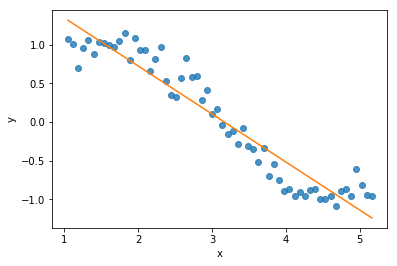

In [5]:
# Lets fit a simple Linear Regression line
fit_poly(1)

**This is how regression line looks like on fitted points. If we observe carefully regression line does not fit the data, the 
model assumes the relationship between x and y is linear and these models are called as High Biased Models. It assumes simplicity and relationship and do not explain even the variation in the data well, even if the sample changes the parameter in
the model hardly respond, and parameters are least sensitive to any changes.**

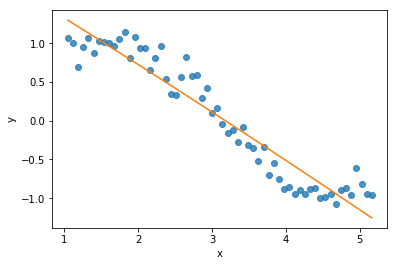

In [6]:
# Fitting a polynomial feature of X^2, here also all the data-point does not fit the line properly.
fit_poly(2)

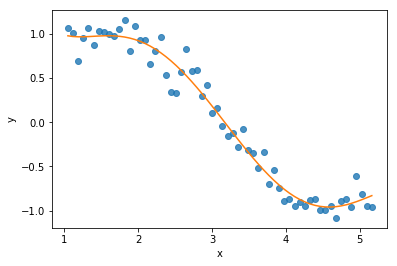

In [7]:
# Now as we keep on increasing the poly degree, we observe the data-points starts fitting the line really well. Hence result 
# in overfitting.High variance problem.Very sensitive to any changes. Not a Generalized model.
fit_poly(5)

**So, How do we decide the complexity of the model ?**<br/>
=> To understand this, we need to split our data-set into train and test. And, then build model to increase in complexity
    to understand the cases of underfitting/overfitting(explain Bias/Variance Tradeoff)

In [8]:
# A function to calculate RMSE of the fitted values with the actual values
def get_rmse(y, y_fit):
    return np.sqrt( metrics.mean_squared_error(y, y_fit))

In [9]:
# Next step, basically splitted the data-set into train/test
train_X, test_X, train_y, test_y = train_test_split(curve.x,
                                                    curve.y,
                                                    test_size=0.40,
                                                    random_state=100)

In [10]:
rmse_df = pd.DataFrame(columns = ["degree", "rmse_train", "rmse_test"])

# I range over complexity from value 1-14 and fit the polynomial and calculate both the train/test errors

for i in range(1,15):
    p = np.polyfit(train_X, train_y, deg = i)
    rmse_df.loc[i-1] = [i, 
                        get_rmse(train_y, np.polyval(p, train_X)),
                        get_rmse(test_y, np.polyval(p,test_X))]

In [11]:
# Training/Testing error wrt degrees
rmse_df

,degree,rmse_train,rmse_test
0,1.0,0.231569,0.237707
1,2.0,0.229154,0.244414
2,3.0,0.115409,0.165920
3,4.0,0.113938,0.164451
4,5.0,0.110525,0.159416
5,6.0,0.105360,0.166479
6,7.0,0.104923,0.161330
7,8.0,0.104414,0.157364
8,9.0,0.100549,0.160113
9,10.0,0.100393,0.158239


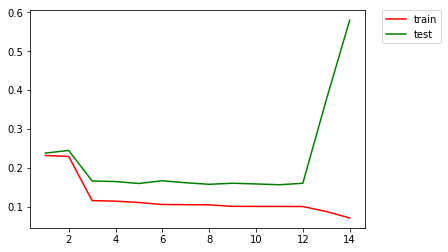

In [12]:
plt.plot(rmse_df.degree,
         rmse_df.rmse_train,
         label = "train",
         color = 'r')

plt.plot(rmse_df.degree,
         rmse_df.rmse_test,
         label = "test",
         color = 'g')

# Place a legend on the axes.(Movement of train/test box into specific location)
plt.legend(bbox_to_anchor=(1.05, 1),
           loc=2,
           borderaxespad=0)

**This is how our plot looks. It can be observed as model complexity increases. The model begins to fit training/test data
  but beyond a point at ceratin complexity even though the training error reduces the test error starts to swell. This is the 
    point 12 below which the model underfits and above it overfits, also known as optimal model complexity point.** 

In [1]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.
